In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [10]:
X1_mean = X[1].mean()
X1_mean

2.6

In [11]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [12]:
X_st = X.copy().astype(np.float64)

In [13]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

In [14]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res
  

In [15]:
X_st[2] = calc_std_feat(X[2])

In [16]:
X_st[3] = calc_std_feat(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [ ]:
L1 регуляризация - Lasso

In [ ]:
f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [ ]:
df/dw1 = d(abs(w1) + abs(w2) + abs(w3)) / dw1 = w1 / np.abs(w1) + 0 + 0

In [ ]:
f'(x, W) + lambda_ * np.sum(np.abs(W))

In [28]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [29]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ / 2 * (W / np.abs(W))) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [30]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.3976406   5.10793351  2.46012679  4.08692802] 39.98154887503836
1000 [57.3999749   5.76652174  1.85621614  4.03913605] 39.80712279096825
1500 [57.399975    5.99152687  1.60431984  4.06911223] 39.782340763126896
2000 [57.399975    6.07257438  1.50040226  4.09330547] 39.7784891065704
2500 [57.399975    6.10297576  1.45780461  4.10605623] 39.77786773926301
3000 [57.399975    6.11471091  1.4404084   4.11194664] 39.777766064624934
3500 [57.399975    6.11932809  1.43331981  4.11451221] 39.77774933934863
4000 [57.399975    6.12116707  1.43043517  4.11559636] 39.777746582221894
4500 [57.399975    6.12190514  1.42926221  4.11604694] 39.77774612712995
5000 [57.399975    6.12220276  1.42878549  4.11623243] 39.777746051881074


array([57.399975  ,  6.12220276,  1.42878549,  4.11623243])

In [ ]:
L2 регуляризация - Ridge

In [ ]:
f(x, W) + (lambda_/2) * np.sum(W**2)

In [ ]:
df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1

In [ ]:
f'(x, W) + lambda_ * np.sum(W)

In [37]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [38]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

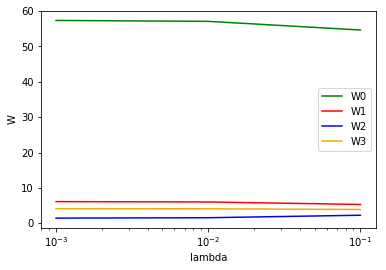

In [61]:
lambda_test = [1e-1, 1e-2, 1e-3]
W_0 = []
W_1 = []
W_2 = []
W_3 = []

for l in lambda_test:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    W_0.append(W[0])
    W_1.append(W[1])
    W_2.append(W[2])
    W_3.append(W[3])
    
plt.plot(lambda_test, W_0, color='green', label='W0')
plt.plot(lambda_test, W_1, color='red', label='W1')
plt.plot(lambda_test, W_2, color='blue', label='W2')
plt.plot(lambda_test, W_3, color='orange', label='W3')

plt.xscale(value='log')

plt.xlabel('lambda')
plt.ylabel('W')
plt.legend()